In [26]:
import os
import cv2
import glob

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
!ls

README.md                   path_to_dataset.txt
image_classifiacation.ipynb requirements.txt
images


In [3]:
path_to_train = 'images/seg_train'
path_to_test = 'images/seg_test'
path_to_pred = 'images/seg_pred'

In [4]:
os.listdir(path_to_train)

['forest', 'buildings', 'glacier', 'street', 'mountain', 'sea']

In [5]:
for fld in os.listdir(path_to_train):
    files_in_train_folders = glob.glob(os.path.join(path_to_train, fld) + '/*.jpg')
    print(f'{len(files_in_train_folders)} files in folder {fld}')

2271 files in folder forest
2191 files in folder buildings
2404 files in folder glacier
2382 files in folder street
2512 files in folder mountain
2274 files in folder sea


In [6]:
files_in_test_folders = glob.glob(path_to_pred + '/*.jpg')
print(f'{len(files_in_test_folders)} files in {path_to_pred}')

7301 files in images/seg_pred


In [7]:
shape_dict_train = {}
for fld in os.listdir(path_to_train):
    print('folder =', fld)
    files_in_train_folders = glob.glob(os.path.join(path_to_train, fld) + '/*.jpg')
    
    for img in files_in_train_folders:
        image = plt.imread(img)
        
        if image.shape in shape_dict_train.keys():
            shape_dict_train[image.shape] += 1
        else:
            shape_dict_train[image.shape] = 1
            
shape_dict_train = dict(sorted(shape_dict_train.items(), key=lambda item: item[1], reverse=True))
shape_dict_train

folder = forest
folder = buildings
folder = glacier
folder = street
folder = mountain
folder = sea


{(150, 150, 3): 13986,
 (113, 150, 3): 7,
 (135, 150, 3): 3,
 (111, 150, 3): 3,
 (108, 150, 3): 2,
 (136, 150, 3): 2,
 (134, 150, 3): 2,
 (142, 150, 3): 2,
 (123, 150, 3): 2,
 (143, 150, 3): 2,
 (146, 150, 3): 2,
 (144, 150, 3): 2,
 (115, 150, 3): 1,
 (133, 150, 3): 1,
 (124, 150, 3): 1,
 (149, 150, 3): 1,
 (76, 150, 3): 1,
 (105, 150, 3): 1,
 (102, 150, 3): 1,
 (120, 150, 3): 1,
 (110, 150, 3): 1,
 (97, 150, 3): 1,
 (119, 150, 3): 1,
 (147, 150, 3): 1,
 (103, 150, 3): 1,
 (131, 150, 3): 1,
 (100, 150, 3): 1,
 (81, 150, 3): 1,
 (141, 150, 3): 1,
 (145, 150, 3): 1,
 (140, 150, 3): 1}

In [15]:
shape_dict_test = {}
for fld in os.listdir(path_to_test):
    print('folder =', fld)
    files_in_test_folders = glob.glob(os.path.join(path_to_test, fld) + '/*.jpg')
    
    for img in files_in_test_folders:
        image = plt.imread(img)
        
        if image.shape in shape_dict_test.keys():
            shape_dict_test[image.shape] += 1
        else:
            shape_dict_test[image.shape] = 1
            
shape_dict_test = dict(sorted(shape_dict_test.items(), key=lambda item: item[1], reverse=True))
shape_dict_test

folder = forest
folder = buildings
folder = glacier
folder = street
folder = mountain
folder = sea


{(150, 150, 3): 2993,
 (141, 150, 3): 1,
 (110, 150, 3): 1,
 (149, 150, 3): 1,
 (72, 150, 3): 1,
 (76, 150, 3): 1,
 (131, 150, 3): 1,
 (81, 150, 3): 1}

In [29]:
dict_maping = {'buildings': 0, 'forest': 1,  'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}
inv_dict_maping = {v: k for k, v in dict_maping.items()}

In [10]:
IMG_WIDTH = 150
IMG_HEIGHT = 150

In [17]:
X_train = []
y_train = []
for fld in os.listdir(path_to_train):
    print('folder =', fld)
    files_in_train_folders = glob.glob(os.path.join(path_to_train, fld) + '/*.jpg')
    
    for img in files_in_train_folders:
        image = cv2. imread(img)
        image_array = cv2.resize(image, (IMG_WIDTH, IMG_HEIGHT))
        X_train.append(list(image_array))
        y_train.append(dict_maping[fld])

folder = forest
folder = buildings
folder = glacier
folder = street
folder = mountain
folder = sea


In [19]:
len(X_train), len(y_train)

(14034, 14034)

In [20]:
X_test = []
y_test = []
for fld in os.listdir(path_to_test):
    print('folder =', fld)
    files_in_test_folders = glob.glob(os.path.join(path_to_test, fld) + '/*.jpg')
    
    for img in files_in_test_folders:
        image = cv2. imread(img)
        image_array = cv2.resize(image, (IMG_WIDTH, IMG_HEIGHT))
        X_test.append(list(image_array))
        y_test.append(dict_maping[fld])

folder = forest
folder = buildings
folder = glacier
folder = street
folder = mountain
folder = sea


In [21]:
len(X_test), len(y_test)

(3000, 3000)

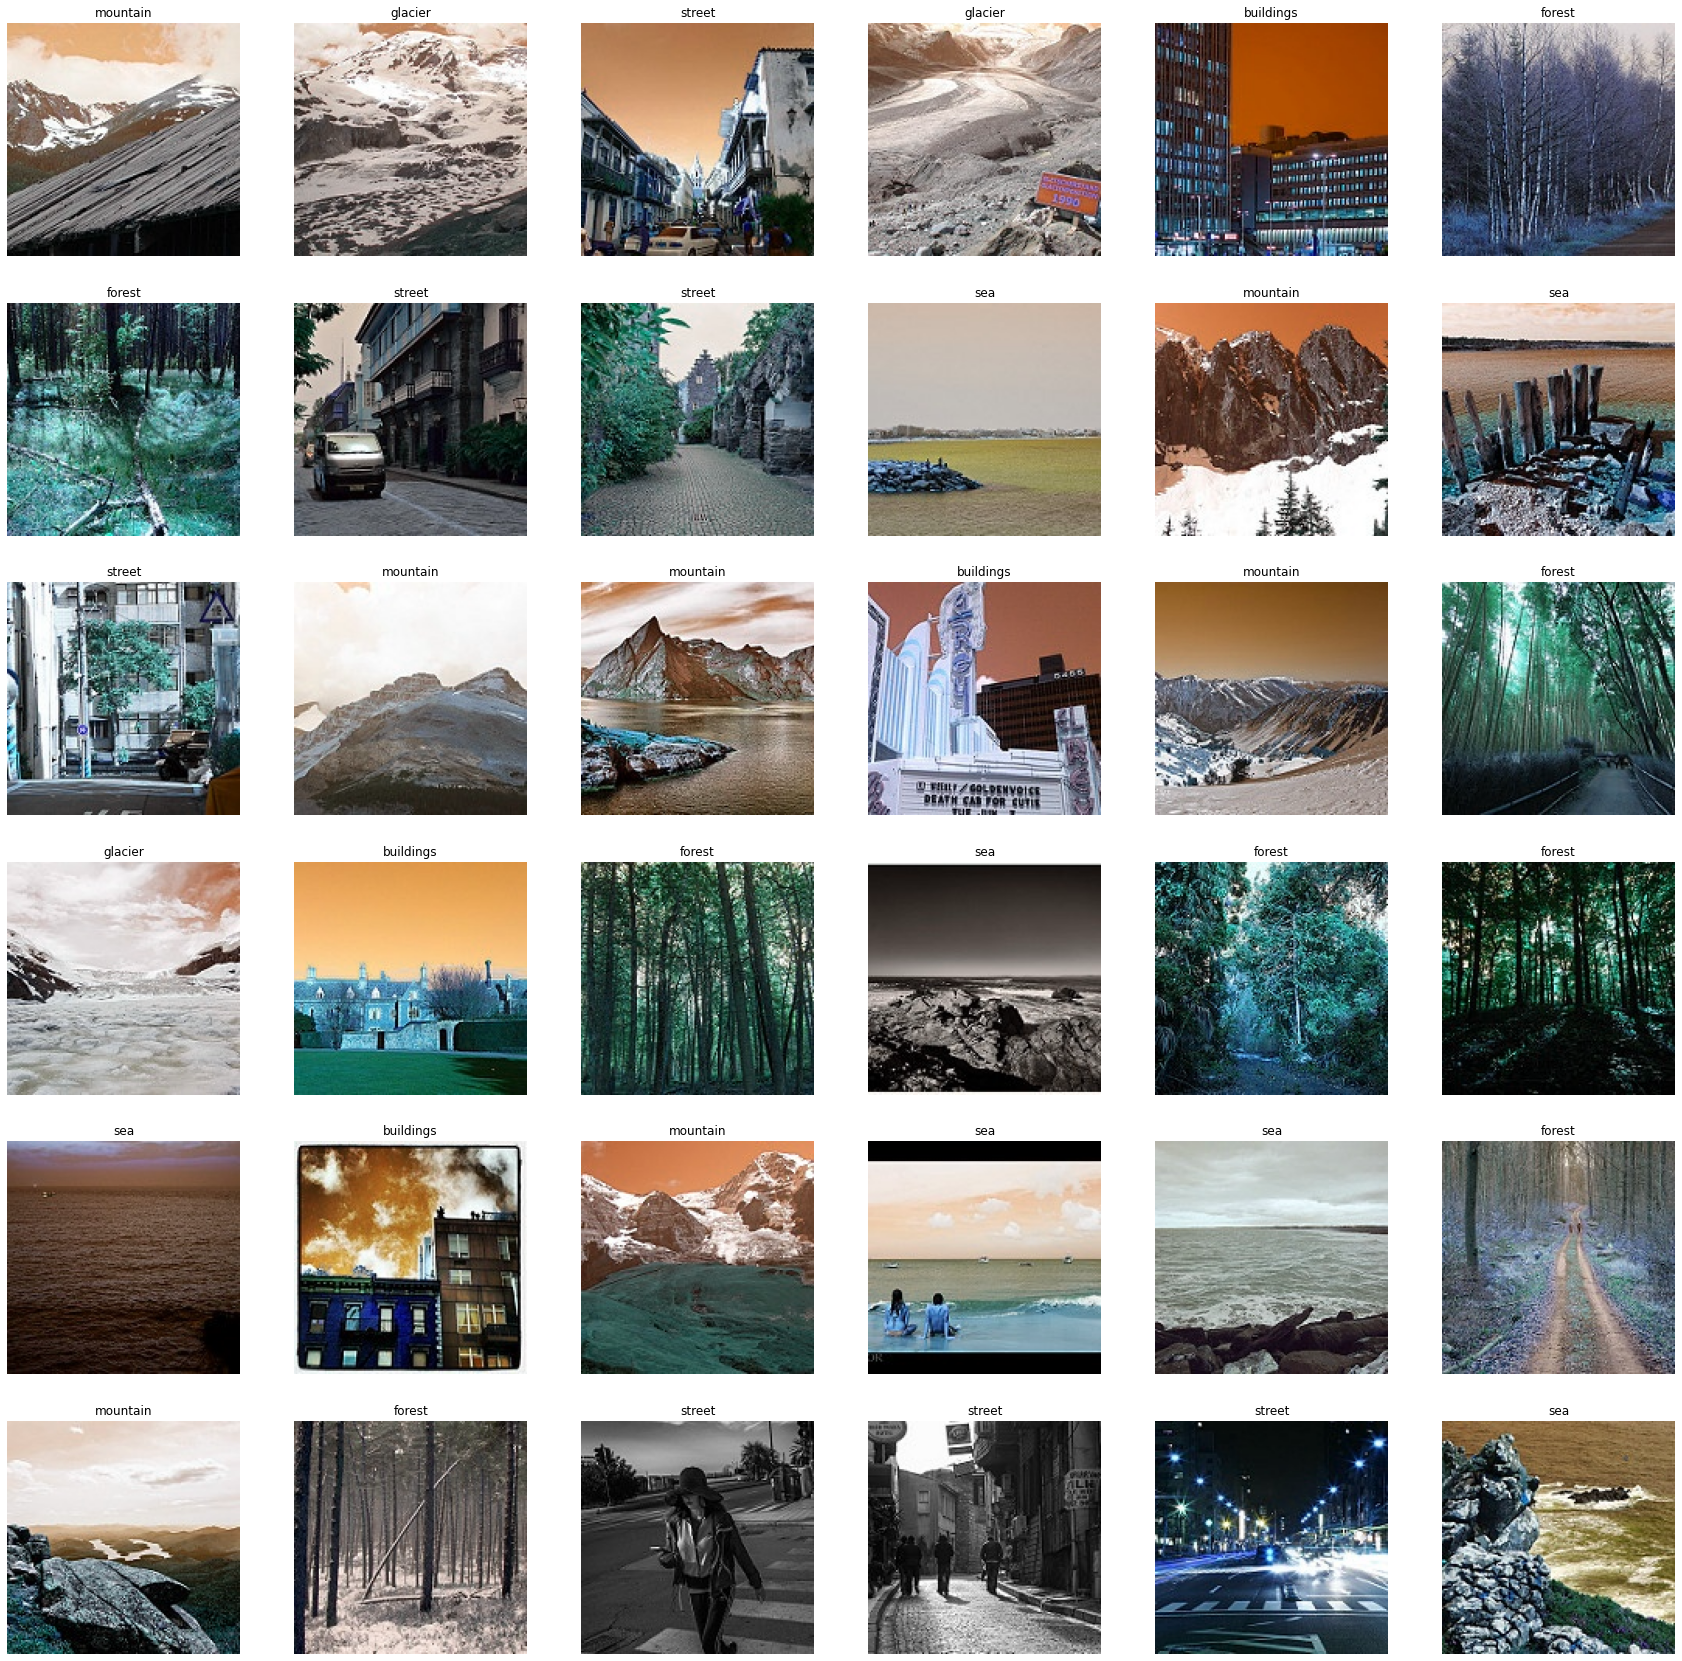

In [31]:
plt.figure(figsize=(30, 30))
for n, i in enumerate(list(np.random.randint(0, len(X_train), 36))):
    plt.subplot(6, 6, n+1)
    plt.imshow(X_train[i])
    plt.axis('off')
    plt.title(inv_dict_maping[y_train[i]])

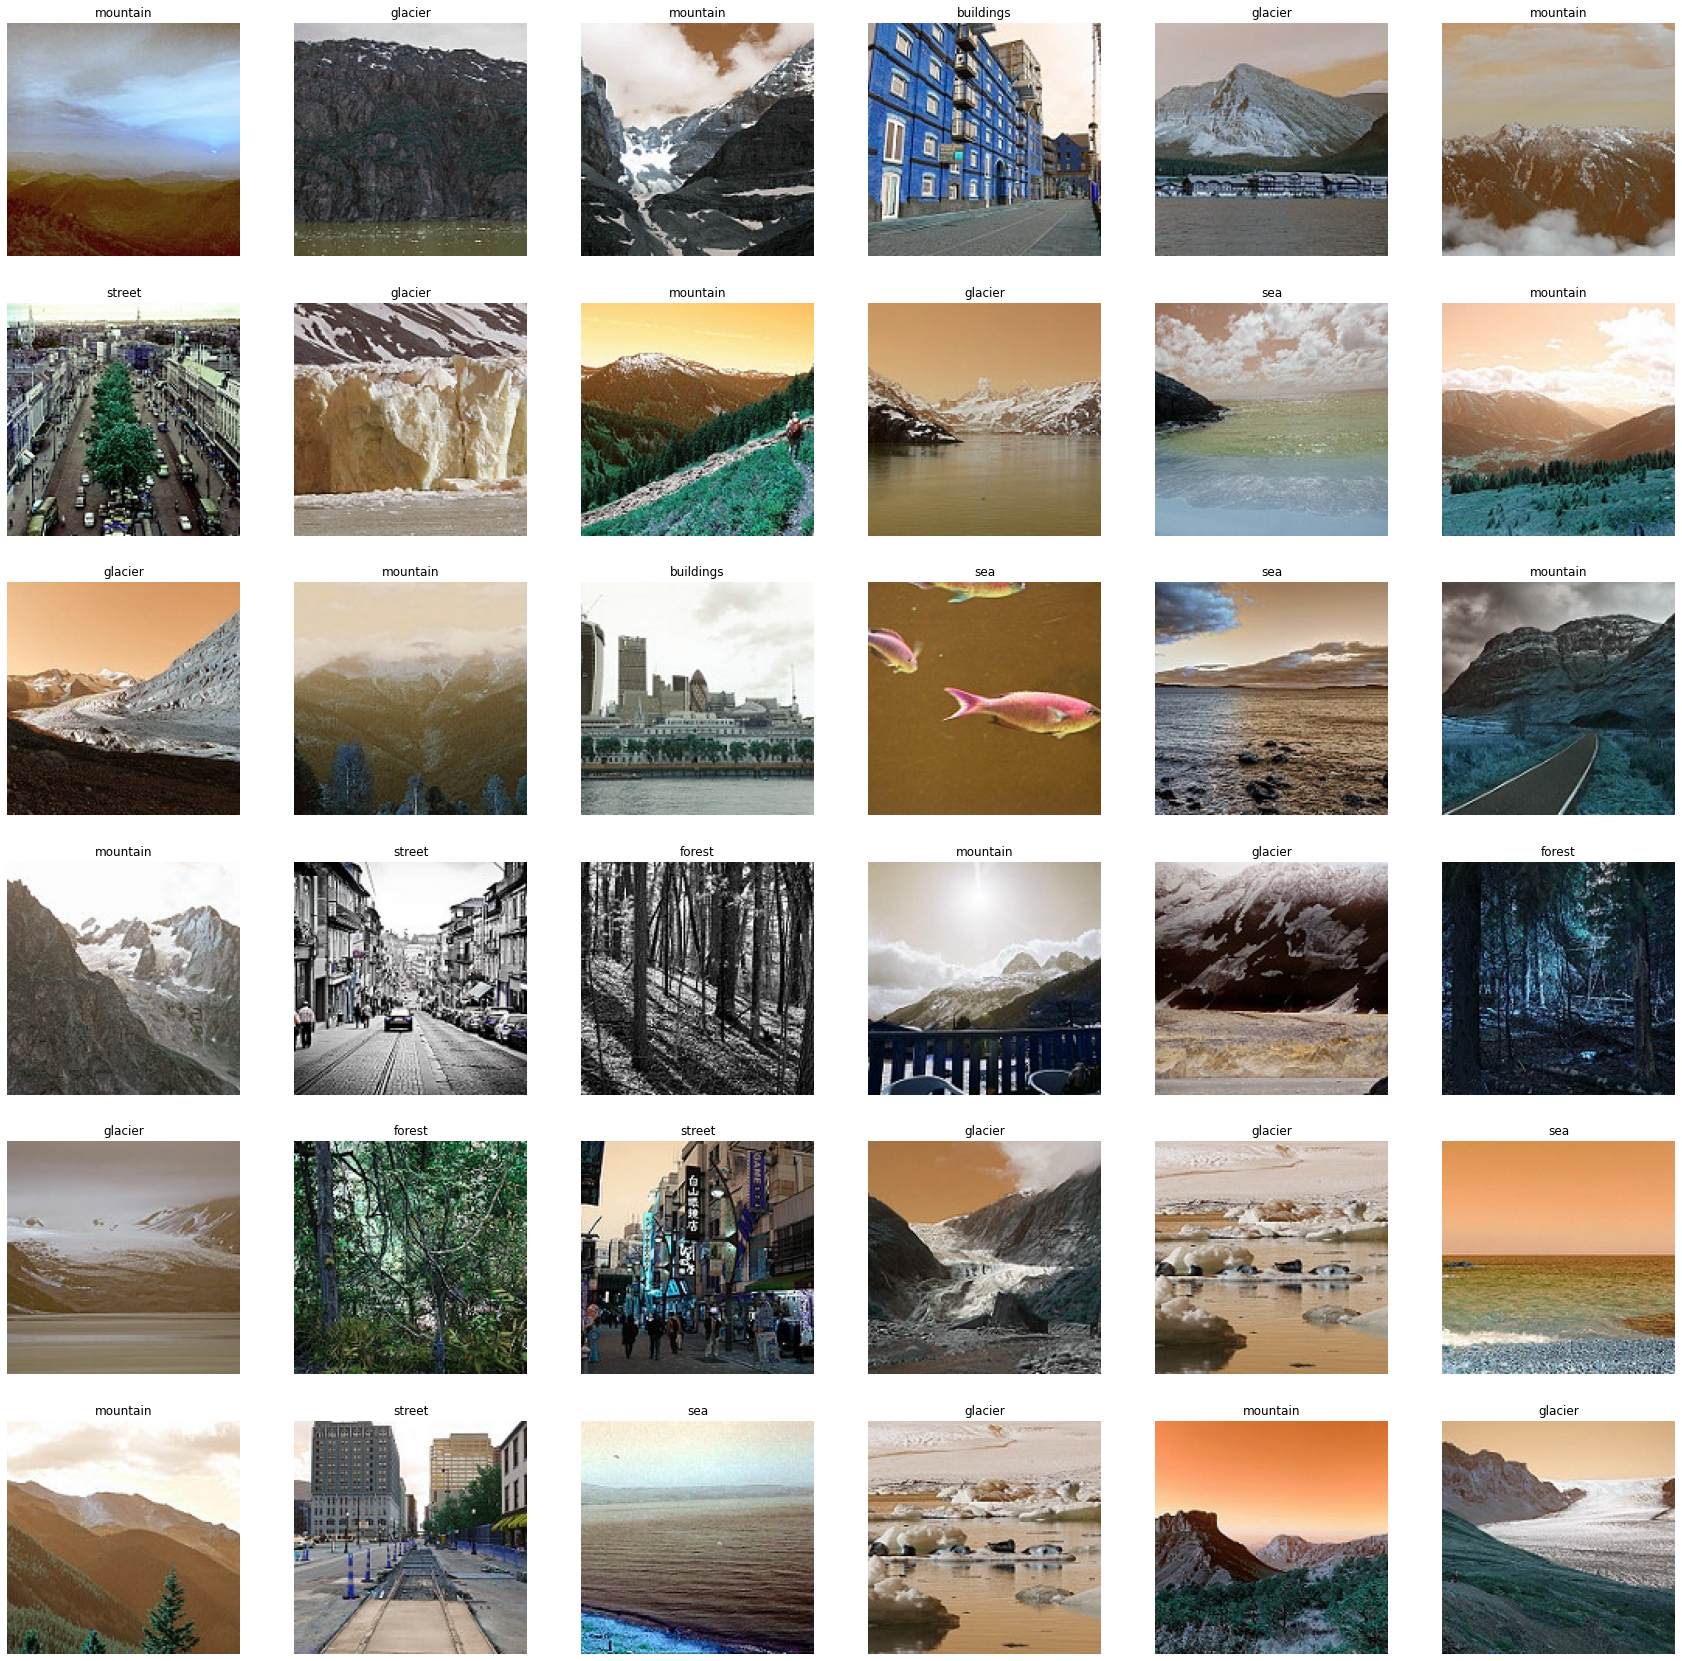

In [32]:
plt.figure(figsize=(30, 30))
for n, i in enumerate(list(np.random.randint(0, len(X_test), 36))):
    plt.subplot(6, 6, n+1)
    plt.imshow(X_test[i])
    plt.axis('off')
    plt.title(inv_dict_maping[y_test[i]])

# MODEL

In [33]:
X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = np.array(X_test)
y_test = np.array(y_test)

In [36]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout